<a href="https://colab.research.google.com/github/dasog94/PresumptionofMontlyRent/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


#Libs

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers

#Load Data

In [15]:
df = pd.read_csv('/content/gdrive/My Drive/recommend_system/tracer/월세데이터.csv', encoding='CP949')

In [16]:
df = df.reindex(columns = df.columns.tolist() + ['1m당_가격'])
for i in range(len(df)):
  df.loc[i, '1m당_가격'] = df.loc[i, '보증금->월세'] / df.loc[i, '전용면적']

In [17]:
df.head(10)

,건물명,건축년도,계약년월,계약일,단지명,도로명,지번,보증금(만원),보증금->월세,본번,부번,법정동명,월세(만원),전용면적,전월세구분,층,거주타입,건물명_건물동명,건물식별번호,건물연령,공동주택명,공시가격,데이터기준일자,위도,경도,학교까지_거리,혜화역까지_거리,한성대역까지_거리,1m당_가격
0,NaN,1999,201804,13,동성아파트(1동),동숭4라길 29,4-161,20000.0,66.666667,4,161,서울특별시 종로구 동숭동,0.0,57.96,전세,3,아파트&오피스텔,동성아파트 1동,24809.0,22.0,동성아파트(1동),162000000.0,2020-07-27,37.583375,127.006271,1235.880709,378.810239,559.530861,1.150219
1,NaN,1999,201910,18,동성아파트(2동),동숭4라길 27,4-157,22000.0,73.333333,4,157,서울특별시 종로구 동숭동,0.0,59.34,전세,6,아파트&오피스텔,동성아파트 2동,29649.0,22.0,동성아파트(2동),158000000.0,2020-07-27,37.583500,127.006149,1221.044377,373.985483,545.305534,1.235816
2,(129-23),1997,201806,2,NaN,동숭4나길 28-1,129-23,13000.0,43.333333,129,23,서울특별시 종로구 동숭동,0.0,47.20,전세,4,연립다세대,예일하우스,17641.0,24.0,(129-23),122000000.0,2020-07-27,37.583036,127.005743,1206.473960,322.626687,597.085546,0.918079
3,(129-24),1997,201712,9,NaN,동숭4나길 28,129-24,14000.0,46.666667,129,24,서울특별시 종로구 동숭동,0.0,38.54,전세,4,연립다세대,0,22280.0,24.0,(129-24),98500000.0,2020-07-27,37.583045,127.005632,1197.013260,313.528991,596.535653,1.210863
4,(129-74),1994,201802,20,NaN,낙산1길 22-1,129-74,25000.0,83.333333,129,74,서울특별시 종로구 동숭동,0.0,54.02,전세,2,연립다세대,0,10769.0,27.0,(129-74),136000000.0,2020-07-27,37.581118,127.005861,1312.654556,339.899030,810.031517,1.542639
5,(129-74),1994,201803,26,NaN,낙산1길 22-1,129-74,20000.0,66.666667,129,74,서울특별시 종로구 동숭동,0.0,34.56,전세,1,연립다세대,0,10769.0,27.0,(129-74),80700000.0,2020-07-27,37.581118,127.005861,1312.654556,339.899030,810.031517,1.929012
6,(129-74),1994,201807,28,NaN,낙산1길 22-1,129-74,33000.0,110.000000,129,74,서울특별시 종로구 동숭동,0.0,54.02,전세,2,연립다세대,0,10769.0,27.0,(129-74),136000000.0,2020-07-27,37.581118,127.005861,1312.654556,339.899030,810.031517,2.036283
7,(130-7),2014,201806,27,NaN,동숭2길 13-3,130-7,1000.0,48.333333,130,7,서울특별시 종로구 동숭동,45.0,15.51,월세,1,연립다세대,0,NaN,NaN,(130-7),61400000.0,2020-07-27,37.581068,127.005069,1256.475426,277.959329,819.514180,3.116269
8,(14-2),1998,201801,24,NaN,동숭4나길 5,14-2,7000.0,48.333333,14,2,서울특별시 종로구 동숭동,25.0,25.60,월세,2,연립다세대,0,10902.0,23.0,(14-2),62500000.0,2020-07-27,37.583173,127.004496,1099.579313,226.983207,596.110922,1.888021
9,(14-2),1998,201808,2,NaN,동숭4나길 5,14-2,9000.0,40.000000,14,2,서울특별시 종로구 동숭동,10.0,25.60,월세,4,연립다세대,0,10902.0,23.0,(14-2),62500000.0,2020-07-27,37.583173,127.004496,1099.579313,226.983207,596.110922,1.562500


In [18]:
df.dtypes

건물명           object
건축년도           int64
계약년월           int64
계약일            int64
단지명           object
도로명           object
지번            object
보증금(만원)      float64
보증금->월세      float64
본번             int64
부번             int64
법정동명          object
월세(만원)       float64
전용면적         float64
전월세구분         object
층              int64
거주타입          object
건물명_건물동명      object
건물식별번호       float64
건물연령         float64
공동주택명         object
공시가격         float64
데이터기준일자       object
위도           float64
경도           float64
학교까지_거리      float64
혜화역까지_거리     float64
한성대역까지_거리    float64
1m당_가격       float64
dtype: object

#Form Data Table

In [19]:
df_arranged = df.loc[:, ['건축년도', '계약년월', '공시가격', '법정동명', '보증금->월세', '학교까지_거리', '혜화역까지_거리', '한성대역까지_거리', '1m당_가격']]
df_arranged = df_arranged.dropna(axis=0)

In [20]:
df_arranged.head(10)

,건축년도,계약년월,공시가격,법정동명,보증금->월세,학교까지_거리,혜화역까지_거리,한성대역까지_거리,1m당_가격
0,1999,201804,162000000.0,서울특별시 종로구 동숭동,66.666667,1235.880709,378.810239,559.530861,1.150219
1,1999,201910,158000000.0,서울특별시 종로구 동숭동,73.333333,1221.044377,373.985483,545.305534,1.235816
2,1997,201806,122000000.0,서울특별시 종로구 동숭동,43.333333,1206.473960,322.626687,597.085546,0.918079
3,1997,201712,98500000.0,서울특별시 종로구 동숭동,46.666667,1197.013260,313.528991,596.535653,1.210863
4,1994,201802,136000000.0,서울특별시 종로구 동숭동,83.333333,1312.654556,339.899030,810.031517,1.542639
5,1994,201803,80700000.0,서울특별시 종로구 동숭동,66.666667,1312.654556,339.899030,810.031517,1.929012
6,1994,201807,136000000.0,서울특별시 종로구 동숭동,110.000000,1312.654556,339.899030,810.031517,2.036283
7,2014,201806,61400000.0,서울특별시 종로구 동숭동,48.333333,1256.475426,277.959329,819.514180,3.116269
8,1998,201801,62500000.0,서울특별시 종로구 동숭동,48.333333,1099.579313,226.983207,596.110922,1.888021
9,1998,201808,62500000.0,서울특별시 종로구 동숭동,40.000000,1099.579313,226.983207,596.110922,1.562500


In [21]:
df_arranged.dtypes

건축년도           int64
계약년월           int64
공시가격         float64
법정동명          object
보증금->월세      float64
학교까지_거리      float64
혜화역까지_거리     float64
한성대역까지_거리    float64
1m당_가격       float64
dtype: object

In [22]:
# 법정동 one hot encoding
df_arranged['법정동명'] = pd.Categorical(df_arranged['법정동명'])
df_arranged['법정동명'] = df_arranged['법정동명'].cat.codes

# # float64 or int8 -> int64
# for each in df_arranged:
#   if df_arranged[each].dtypes == 'float64' or df_arranged[each].dtypes == 'int8':
#     df_arranged = df_arranged.astype({each : 'int64'})

In [23]:
df_arranged.head(10)

,건축년도,계약년월,공시가격,법정동명,보증금->월세,학교까지_거리,혜화역까지_거리,한성대역까지_거리,1m당_가격
0,1999,201804,162000000.0,1,66.666667,1235.880709,378.810239,559.530861,1.150219
1,1999,201910,158000000.0,1,73.333333,1221.044377,373.985483,545.305534,1.235816
2,1997,201806,122000000.0,1,43.333333,1206.473960,322.626687,597.085546,0.918079
3,1997,201712,98500000.0,1,46.666667,1197.013260,313.528991,596.535653,1.210863
4,1994,201802,136000000.0,1,83.333333,1312.654556,339.899030,810.031517,1.542639
5,1994,201803,80700000.0,1,66.666667,1312.654556,339.899030,810.031517,1.929012
6,1994,201807,136000000.0,1,110.000000,1312.654556,339.899030,810.031517,2.036283
7,2014,201806,61400000.0,1,48.333333,1256.475426,277.959329,819.514180,3.116269
8,1998,201801,62500000.0,1,48.333333,1099.579313,226.983207,596.110922,1.888021
9,1998,201808,62500000.0,1,40.000000,1099.579313,226.983207,596.110922,1.562500


In [24]:
df_arranged.dtypes

건축년도           int64
계약년월           int64
공시가격         float64
법정동명            int8
보증금->월세      float64
학교까지_거리      float64
혜화역까지_거리     float64
한성대역까지_거리    float64
1m당_가격       float64
dtype: object

#Preprocessing

#Dividing into Feature and Target

Divide each into the features and target

In [25]:
# target = np.array(df_arranged.pop('보증금->월세'))
# features = np.array(df_arranged)

In [37]:
target = np.array(df_arranged.pop('1m당_가격'))
features = np.array(df_arranged)

Divede into the train, test for final model

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(features, 
#                                                     target, 
#                                                     test_size=0.1, 
#                                                     shuffle=False, 
#                                                     random_state=1004)

#Model with K-Fold

model

In [26]:
def build_model(feature_shape):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(feature_shape,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k-fold croos-validation

In [38]:
# normally 4 or 5
k = 4 

num_val_samples = len(features) // k
num_epochs = 40
all_scores = []
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = features[i * num_val_samples: (i + 1) * num_val_samples]  # 검증 데이터 준비: k번째 분할
    val_targets = target[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(  # 훈련 데이터 준비: 다른 분할 전체
        [features[:i * num_val_samples],
         features[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [target[:i * num_val_samples],
        target[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model(features.shape[1])  # 케라스 모델 구성(컴파일 포함)
    history = model.fit(partial_train_data, partial_train_targets,  # 모델 훈련(verbose=0이므로 훈련 과정이 출력되지 않습니다.)
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)  # 검증 세트로 모델 평가
    all_scores.append(val_mae)
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [ ]:
#거리 추가, 1m2당 가격으로 전환 전
#all_scores

[51.13697814941406, 42.92242431640625, 65.04145812988281, 48.372886657714844]

In [36]:
# 거리만 추가, epoch 40
all_scores

[48.61420822143555, 43.31092834472656, 65.10830688476562, 1183.0198974609375]

In [39]:
all_scores

[3.4825620651245117,
 0.6292937397956848,
 0.7432553768157959,
 0.8387060761451721]

In [40]:
np.mean(all_scores)

1.4234543144702911

In [41]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

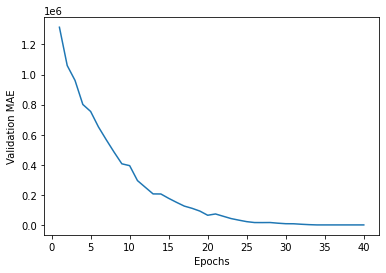

In [42]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# def smooth_curve(points, factor=0.9):
#     smoothed_points = []
#     for point in points:
#         if smoothed_points:
#             previous = smoothed_points[-1]
#             smoothed_points.append(previous * factor + point * (1 - factor))
#         else:
#             smoothed_points.append(point)
#     return smoothed_points

# smooth_mae_history = smooth_curve(average_mae_history[10:])

# plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
# plt.xlabel('Epochs')
# plt.ylabel('Validation MAE')
# plt.show()

#Final Test

In [ ]:
model = build_model()  # 새롭게 컴파일된 모델을 얻습니다.
model.fit(X_train, y_train,  # 전체 데이터로 훈련시킵니다.
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

#Reference

3.6 주택 가격 예측: 회귀 문제 : 
https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%94%A5%EB%9F%AC%EB%8B%9D/3-6-%EC%A3%BC%ED%83%9D-%EA%B0%80%EA%B2%A9-%EC%98%88%EC%B8%A1-%ED%9A%8C%EA%B7%80-%EB%AC%B8%EC%A0%9C/